In [1]:
#Make sure you are using the cmpi6-2019.10 kernel 

#Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys
sys.path.insert(0,'/glade/u/home/abaker/repos/ldcpy')
import ldcpy

#Display output of plots directly in Notebook
%matplotlib inline
#Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

#silence warnings
import warnings
warnings.filterwarnings("ignore")

#if you want to use the DASK daskboard on Casper, then modify the below and run
#import dask
#dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/dav/user/abaker/proxy/{port}/status'})

#if you want to use the DASK daskboard on Cheyenne, then modify the below and run
import dask
dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/ch/user/abaker/proxy/{port}/status'})


In [2]:
from dask.distributed import Client

# for Cheyenne
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=36:mem=109GB",
    cores=36,
    processes=9,
)

# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=35)
cluster

In [3]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Client Scheduler: tcp://10.148.5.186:34531 Dashboard: https://jupyterhub.ucar.edu/ch/user/abaker/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
# load the first 86 years of PRECT data
col_PRECT = ldcpy.open_datasets(
    ["PRECT"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/PRECT.daily.19200101-20051231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.PRECT.daily.19200101-20051231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_PRECT

dataset size in GB 13.89



,Array,Chunk
Bytes,13.89 GB,110.59 MB
Shape,"(2, 31390, 192, 288)","(1, 500, 192, 288)"
Count,126 Tasks,126 Chunks
Type,float32,numpy.ndarray


In [6]:
ldcpy.compare_stats(col_PRECT, "PRECT", "orig", "lossy", time=0)

Comparing orig data (set1) to lossy data (set2) at time = 0
 
mean set1: 2.305e-08
mean set2: 2.305e-08
mean diff: 2.518e-13
 
variance set1: 4.618e-15
variance set2: 4.618e-15
 
standard deviation set1: 6.796e-08
standard deviation set2: 6.796e-08
 
max value set1: 1.183e-06
max value set2: 1.183e-06
min value set1: -5.743e-22
min value set2: -5.743e-22
 
max abs diff: 2.842e-11
min abs diff: 0
mean abs diff: 2.518e-13
mean squared diff: 6.34e-26
root mean squared diff: 9.221e-13
normalized root mean squared diff: 7.794e-07
normalized max pointwise error: 2.402e-05
pearson correlation coefficient: 1
ks p-value: 0.4398
spatial relative error(% > 0.0001): 0
ssim: 1


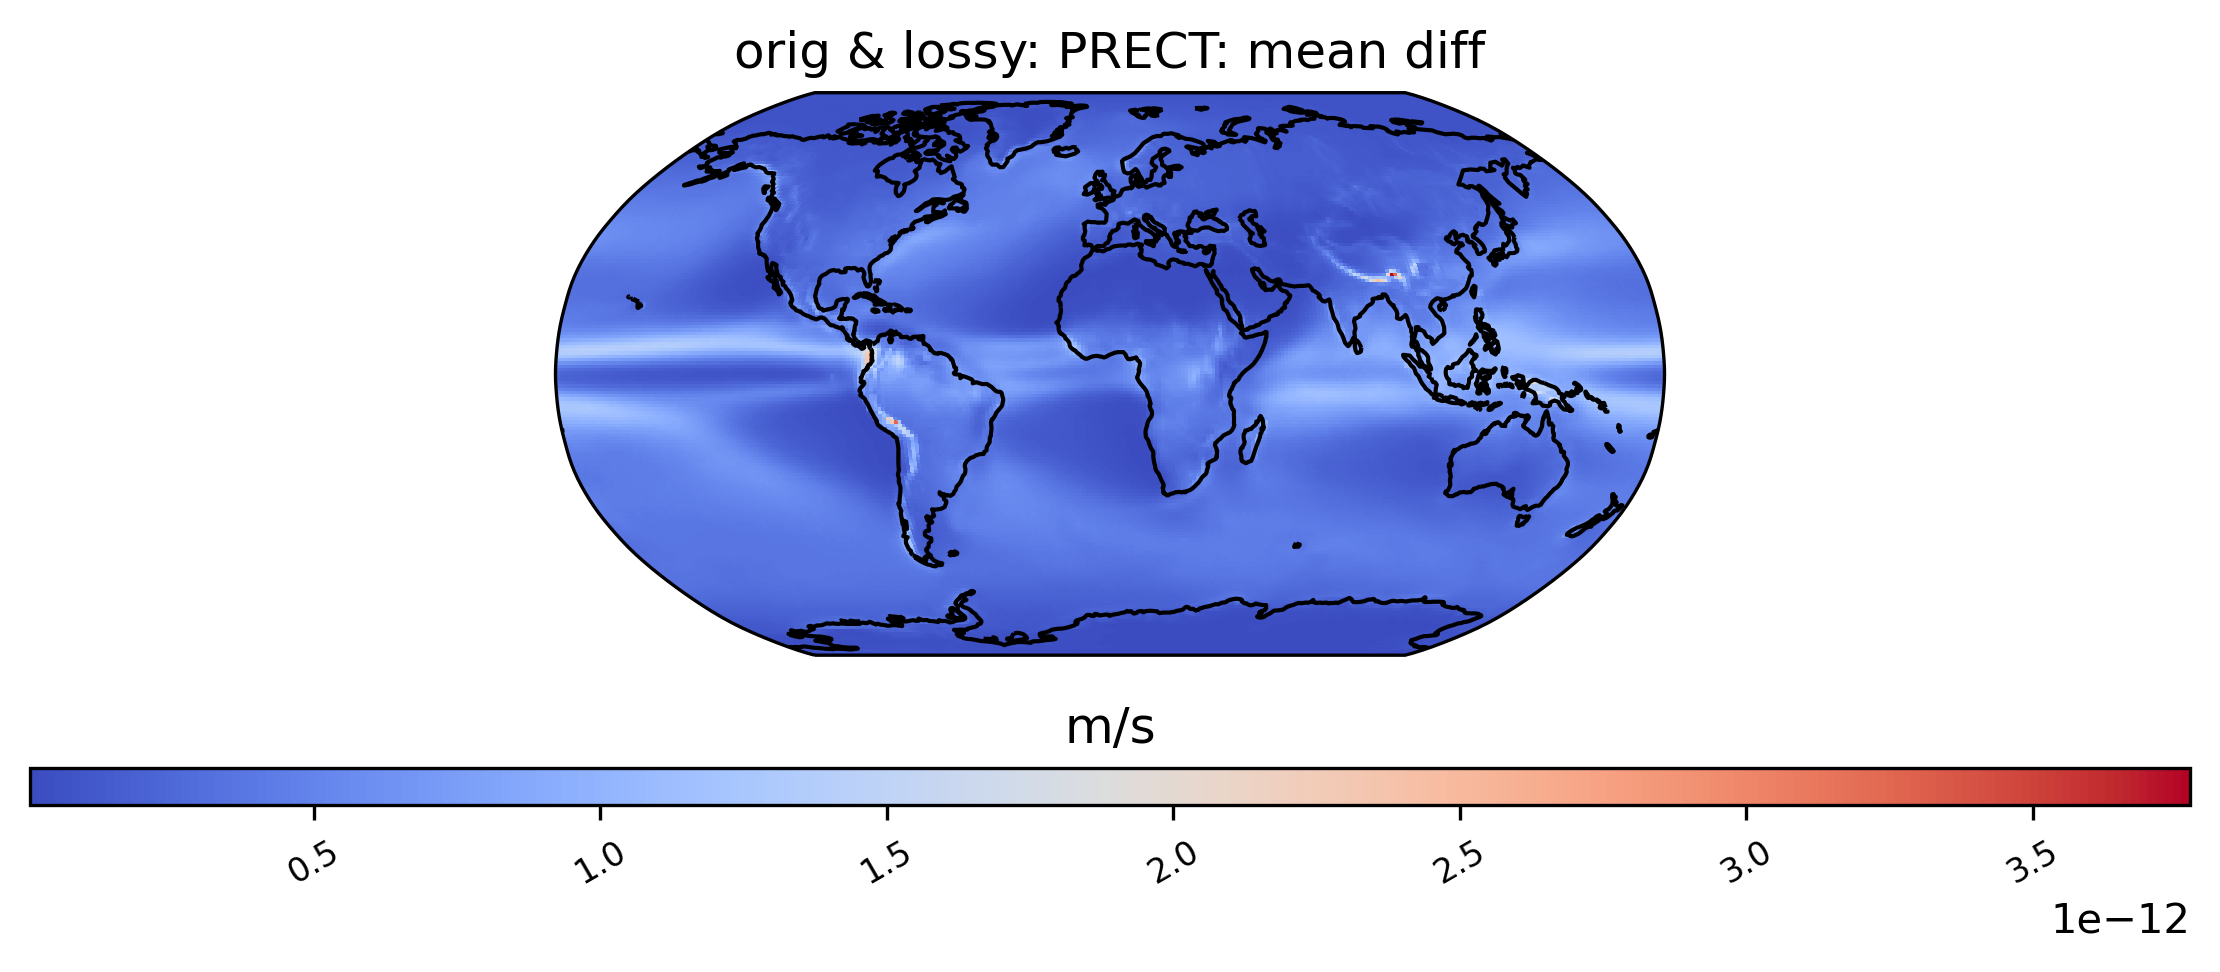

In [7]:
# diff between mean PRECT values across the entire timeseries
ldcpy.plot(
    col_PRECT,
    "PRECT",
    sets=["orig", "lossy"],
    metric="mean",
    metric_type="diff",
)

In [8]:
cluster.close()
client.close()